In [1]:
import numpy.random as rand
import h5py
import sys
sys.path.append("/global/homes/v/vaisakh/.local/desicode")
print(sys.path)
import astropy.io.fits as pf
import pandas as pd
import python_lib
from python_lib import Cosmology
from python_lib.Cosmology import set_cosmology, comoving_volume,comoving_distance,set_Planck15
import numpy as np
import pycorr
from pycorr import TwoPointCorrelationFunction, TwoPointEstimator, NaturalTwoPointEstimator, utils, setup_logging
# To activate logging
setup_logging()
import importlib
importlib.reload(pycorr)
from astropy.table import Table,vstack
import pandas as pd
import scipy.interpolate as interpol
import os
#print('environment variables')
#print(os.environ)
from sys import argv
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
###Dealing with data

hdus=Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_S_clustering.dat.fits')
hdds=pf.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_S_clustering.dat.fits') 

data2s = hdds[1].data
#print(data2s)
total=len(data2s)
print("Total DESI QSOs in EDA South:",total)

hdun=Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_N_clustering.dat.fits')
hddn=pf.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_N_clustering.dat.fits') 

data2n = hddn[1].data
#print(data2n)
total=len(data2n)
print("Total DESI QSOs in EDA North:",total)

hdurs=Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_S_3_clustering.ran.fits')  #combined randoms
hddrs=pf.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_S_3_clustering.ran.fits')
data2rs = hddrs[1].data
#print(data2rs)
hdurn=Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_N_3_clustering.ran.fits')  #combined randoms
hddrn=pf.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_N_3_clustering.ran.fits')
data2rn = hddrn[1].data
#print(data2rn)


['/pscratch/sd/v/vaisakh/Uchuulcmocks_skycoord_mass/Uchuulcmocks_mass', '', '/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20230725-1.0.0/code/desiutil/main/lib/python3.10/site-packages', '/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20230725-1.0.0/code/desitarget/main/lib/python3.10/site-packages', '/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20230725-1.0.0/code/desilike/main/lib/python3.10/site-packages', '/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20230725-1.0.0/code/velocileptors/master/lib/python3.10/site-packages', '/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20230725-1.0.0/code/regressis/main/lib/python3.10/site-packages', '/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20230725-1.0.0/code/mockfactory/main/lib/python3.10/site-packages', '/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20230725-1.0.0/code/mpyt

    Header size is not multiple of 2880: 1
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]


In [2]:
#hddrn[1].header

In [3]:
data2s['RA']

array([148.75137656, 148.56692767, 148.43269334, ..., 151.17572944,
       151.48530557, 151.028942  ])

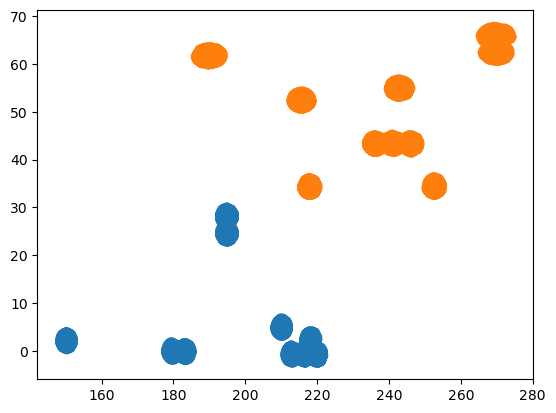

In [4]:
plt.scatter(data2s['RA'],data2s['DEC'])
plt.scatter(data2n['RA'],data2n['DEC'])

In [5]:
df = pd.read_csv('/pscratch/sd/v/vaisakh/Uchuulcmocks_skycoord_mass/Uchuulcmocks_mass/fung_rotse_coord.csv',skiprows=0)

In [6]:
df


,Field,RA,DEC,Ecliptic,Ngal,Nnights,Nnights.1,Nnights.2,Nnights.3,Volume
0,Name,J2000,J2000,Latitude,IIIa,IIIb,IIIc,IIId,Mpc3,year
1,ABELL2717,00:03:19,-35:57:00,-32.9,222,0,0,62,0,9.93
2,ABELL2764,00:20:28,-49:13:12,-45.9,99,0,0,40,0,2.5
3,ABELL44,00:29:36,+12:01:12,8.1,19,0,0,5,0,0.54
4,ABELL2800,00:38:00,-25:04:48,-26.6,351,0,0,73,0,12.17
...,...,...,...,...,...,...,...,...,...,...
319,ABELL2634,23:37:57,+26:54:33,26.7,348,0,247,10,59,54.37
320,ABELL2657,23:44:54,+09:09:00,9.9,142,8,157,45,31,44.11
321,ABELL4038,23:47:40,-28:07:48,-24.4,676,0,0,68,0,7.17
322,ABELL2666,23:50:54,+27:09:00,25.6,62,0,270,9,58,64.23


In [7]:
df2 = pd.read_csv('/pscratch/sd/v/vaisakh/Uchuulcmocks_skycoord_mass/Uchuulcmocks_mass/quimbycoord.csv',skiprows=0)
df2

,Field Name,RA,DEC,Ngal,lum25Mpc,lum25-50Mpc,lum50-100Mpc,lum100-200Mpc
0,A1,00:38:19,+40:26:21.0,9,0.0003,0.0000,0.0632,0.0000
1,A2,00:42:44,+41:16:09.0,9,1.8548,0.0000,0.5666,0.7310
2,A3,00:47:09,+42:05:57.0,3,0.0000,0.0000,0.0000,0.0998
3,ABELL76,00:39:48,+06:46:00.0,16,0.0000,0.0000,0.7361,44.5832
4,ABELL119,00:56:24,-01:16:00.0,367,0.0000,0.0000,1.0811,237.0232
...,...,...,...,...,...,...,...,...
130,V48,12:17:50,+04:40:27.0,30,0.1652,5.3605,0.0000,6.7363
131,V49,12:40:51,+03:02:39.0,64,1.2832,0.0000,0.0845,5.3663
132,V50,12:34:20,+03:02:39.0,33,2.0173,0.0316,1.0384,1.9567
133,V51,12:27:48,+03:02:39.0,58,0.9776,0.0755,1.4543,1.6601


In [8]:
df['RA'] = df['RA'].astype(str)
df['DEC'] = df['DEC'].astype(str)
df


,Field,RA,DEC,Ecliptic,Ngal,Nnights,Nnights.1,Nnights.2,Nnights.3,Volume
0,Name,J2000,J2000,Latitude,IIIa,IIIb,IIIc,IIId,Mpc3,year
1,ABELL2717,00:03:19,-35:57:00,-32.9,222,0,0,62,0,9.93
2,ABELL2764,00:20:28,-49:13:12,-45.9,99,0,0,40,0,2.5
3,ABELL44,00:29:36,+12:01:12,8.1,19,0,0,5,0,0.54
4,ABELL2800,00:38:00,-25:04:48,-26.6,351,0,0,73,0,12.17
...,...,...,...,...,...,...,...,...,...,...
319,ABELL2634,23:37:57,+26:54:33,26.7,348,0,247,10,59,54.37
320,ABELL2657,23:44:54,+09:09:00,9.9,142,8,157,45,31,44.11
321,ABELL4038,23:47:40,-28:07:48,-24.4,676,0,0,68,0,7.17
322,ABELL2666,23:50:54,+27:09:00,25.6,62,0,270,9,58,64.23


In [9]:
df2['RA'] = df2['RA'].astype(str)
df2['DEC'] = df2['DEC'].astype(str)
df2

,Field Name,RA,DEC,Ngal,lum25Mpc,lum25-50Mpc,lum50-100Mpc,lum100-200Mpc
0,A1,00:38:19,+40:26:21.0,9,0.0003,0.0000,0.0632,0.0000
1,A2,00:42:44,+41:16:09.0,9,1.8548,0.0000,0.5666,0.7310
2,A3,00:47:09,+42:05:57.0,3,0.0000,0.0000,0.0000,0.0998
3,ABELL76,00:39:48,+06:46:00.0,16,0.0000,0.0000,0.7361,44.5832
4,ABELL119,00:56:24,-01:16:00.0,367,0.0000,0.0000,1.0811,237.0232
...,...,...,...,...,...,...,...,...
130,V48,12:17:50,+04:40:27.0,30,0.1652,5.3605,0.0000,6.7363
131,V49,12:40:51,+03:02:39.0,64,1.2832,0.0000,0.0845,5.3663
132,V50,12:34:20,+03:02:39.0,33,2.0173,0.0316,1.0384,1.9567
133,V51,12:27:48,+03:02:39.0,58,0.9776,0.0755,1.4543,1.6601


In [10]:
rasplit = df['RA'][1:].str.split(':',expand=True)
rasplit

,0,1,2
1,00,03,19
2,00,20,28
3,00,29,36
4,00,38,00
5,00,38,19
...,...,...,...
319,23,37,57
320,23,44,54
321,23,47,40
322,23,50,54


In [11]:
rasplit=rasplit.astype(int)

In [12]:
radecimal = rasplit[0] + rasplit[1]/60 + rasplit[2]/3600
radecimal

1       0.055278
2       0.341111
3       0.493333
4       0.633333
5       0.638611
         ...    
319    23.632500
320    23.748333
321    23.794444
322    23.848333
323    23.945278
Length: 323, dtype: float64

In [13]:
rasplit2 = df2['RA'].str.split(':',expand=True)


In [14]:
rasplit2=rasplit2.astype(int)
rasplit2


,0,1,2
0,0,38,19
1,0,42,44
2,0,47,9
3,0,39,48
4,0,56,24
...,...,...,...
130,12,17,50
131,12,40,51
132,12,34,20
133,12,27,48


In [15]:
radecimal2 = rasplit2[0] + rasplit2[1]/60 + rasplit2[2]/3600
radecimal2

0       0.638611
1       0.712222
2       0.785833
3       0.663333
4       0.940000
         ...    
130    12.297222
131    12.680833
132    12.572222
133    12.463333
134    12.354722
Length: 135, dtype: float64

In [16]:
df['DEC'][1:]

1      -35:57:00
2      -49:13:12
3      +12:01:12
4      -25:04:48
5      +40:26:21
         ...    
319    +26:54:33
320    +09:09:00
321    -28:07:48
322    +27:09:00
323    -34:40:12
Name: DEC, Length: 323, dtype: object

In [17]:
decsplit = df['DEC'][1:].str.split(':',expand=True)
print(decsplit)
decsplit=decsplit.astype(int)


       0   1   2
1    -35  57  00
2    -49  13  12
3    +12  01  12
4    -25  04  48
5    +40  26  21
..   ...  ..  ..
319  +26  54  33
320  +09  09  00
321  -28  07  48
322  +27  09  00
323  -34  40  12

[323 rows x 3 columns]


In [18]:
decsplit2 = df2['DEC'].str.split(':',expand=True)
print(decsplit2)
decsplit2

        0   1     2
0     +40  26  21.0
1     +41  16  09.0
2     +42  05  57.0
3     +06  46  00.0
4     -01  16  00.0
..    ...  ..   ...
130   +04  40  27.0
131   +03  02  39.0
132   +03  02  39.0
133   +03  02  39.0
134   +03  02  39.0

[135 rows x 3 columns]


,0,1,2
0,+40,26,21.0
1,+41,16,09.0
2,+42,05,57.0
3,+06,46,00.0
4,-01,16,00.0
...,...,...,...
130,+04,40,27.0
131,+03,02,39.0
132,+03,02,39.0
133,+03,02,39.0


In [19]:
decsplit22 = decsplit2[2].str.split('.',expand=True)

In [20]:
decsplit22

,0,1
0,21,0
1,09,0
2,57,0
3,00,0
4,00,0
...,...,...
130,27,0
131,39,0
132,39,0
133,39,0


In [21]:
decsplit2a = decsplit2[0].astype(int)
decsplit2b = decsplit2[1].astype(int)
decsplit2c = decsplit22[0].astype(int)


In [22]:
DECsplit2 = []
for jj in range(len(decsplit2a)):
        if decsplit2a[jj] < 0:
            print("negative at",jj)
            #print(DECsplit)
            DECsplit2.append( - ((-decsplit2a[jj]) + decsplit2b[jj]/60 + decsplit2c[jj]/3600))
            #print(DECsplit)
        elif decsplit2a[jj] >= 0:
            print("positive at",jj)
            DECsplit2.append(decsplit2a[jj] + decsplit2b[jj]/60 + decsplit2c[jj]/3600)
            #print(DECsplit)
        else:
            DECsplit2.append(np.NaN)
            
df2['DEC-decimal'] = DECsplit2
df2['RA-decimal'] = radecimal2

positive at 0
positive at 1
positive at 2
positive at 3
negative at 4
positive at 5
positive at 6
positive at 7
positive at 8
positive at 9
negative at 10
positive at 11
positive at 12
negative at 13
positive at 14
positive at 15
positive at 16
positive at 17
positive at 18
positive at 19
positive at 20
positive at 21
positive at 22
positive at 23
positive at 24
positive at 25
positive at 26
positive at 27
positive at 28
positive at 29
positive at 30
positive at 31
positive at 32
positive at 33
positive at 34
positive at 35
positive at 36
positive at 37
positive at 38
positive at 39
positive at 40
positive at 41
positive at 42
positive at 43
positive at 44
positive at 45
positive at 46
positive at 47
positive at 48
positive at 49
positive at 50
positive at 51
positive at 52
positive at 53
positive at 54
positive at 55
positive at 56
positive at 57
positive at 58
positive at 59
positive at 60
positive at 61
positive at 62
positive at 63
positive at 64
positive at 65
positive at 66
posit

In [23]:
df2

,Field Name,RA,DEC,Ngal,lum25Mpc,lum25-50Mpc,lum50-100Mpc,lum100-200Mpc,DEC-decimal,RA-decimal
0,A1,00:38:19,+40:26:21.0,9,0.0003,0.0000,0.0632,0.0000,40.439167,0.638611
1,A2,00:42:44,+41:16:09.0,9,1.8548,0.0000,0.5666,0.7310,41.269167,0.712222
2,A3,00:47:09,+42:05:57.0,3,0.0000,0.0000,0.0000,0.0998,42.099167,0.785833
3,ABELL76,00:39:48,+06:46:00.0,16,0.0000,0.0000,0.7361,44.5832,6.766667,0.663333
4,ABELL119,00:56:24,-01:16:00.0,367,0.0000,0.0000,1.0811,237.0232,-1.266667,0.940000
...,...,...,...,...,...,...,...,...,...,...
130,V48,12:17:50,+04:40:27.0,30,0.1652,5.3605,0.0000,6.7363,4.674167,12.297222
131,V49,12:40:51,+03:02:39.0,64,1.2832,0.0000,0.0845,5.3663,3.044167,12.680833
132,V50,12:34:20,+03:02:39.0,33,2.0173,0.0316,1.0384,1.9567,3.044167,12.572222
133,V51,12:27:48,+03:02:39.0,58,0.9776,0.0755,1.4543,1.6601,3.044167,12.463333


In [24]:
df['DEC-0'] = decsplit[0]
df['DEC-1'] = decsplit[1]
df['DEC-2'] = decsplit[2]
df['RA-0'] = rasplit[0]
df['RA-1'] = rasplit[1]
df['RA-2'] = rasplit[2]

In [25]:
df

,Field,RA,DEC,Ecliptic,Ngal,Nnights,Nnights.1,Nnights.2,Nnights.3,Volume,DEC-0,DEC-1,DEC-2,RA-0,RA-1,RA-2
0,Name,J2000,J2000,Latitude,IIIa,IIIb,IIIc,IIId,Mpc3,year,NaN,NaN,NaN,NaN,NaN,NaN
1,ABELL2717,00:03:19,-35:57:00,-32.9,222,0,0,62,0,9.93,-35.0,57.0,0.0,0.0,3.0,19.0
2,ABELL2764,00:20:28,-49:13:12,-45.9,99,0,0,40,0,2.5,-49.0,13.0,12.0,0.0,20.0,28.0
3,ABELL44,00:29:36,+12:01:12,8.1,19,0,0,5,0,0.54,12.0,1.0,12.0,0.0,29.0,36.0
4,ABELL2800,00:38:00,-25:04:48,-26.6,351,0,0,73,0,12.17,-25.0,4.0,48.0,0.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,ABELL2634,23:37:57,+26:54:33,26.7,348,0,247,10,59,54.37,26.0,54.0,33.0,23.0,37.0,57.0
320,ABELL2657,23:44:54,+09:09:00,9.9,142,8,157,45,31,44.11,9.0,9.0,0.0,23.0,44.0,54.0
321,ABELL4038,23:47:40,-28:07:48,-24.4,676,0,0,68,0,7.17,-28.0,7.0,48.0,23.0,47.0,40.0
322,ABELL2666,23:50:54,+27:09:00,25.6,62,0,270,9,58,64.23,27.0,9.0,0.0,23.0,50.0,54.0


In [26]:
RAdecimal = (rasplit[0] + rasplit[1]/60 + rasplit[2]/3600)
#decdecimal = - (decsplit[0] + decsplit[1]/60 + decsplit[2]/3600)
print(RAdecimal)
df["RA-decimal"] = RAdecimal
print(df)


1       0.055278
2       0.341111
3       0.493333
4       0.633333
5       0.638611
         ...    
319    23.632500
320    23.748333
321    23.794444
322    23.848333
323    23.945278
Length: 323, dtype: float64
         Field        RA        DEC  Ecliptic  Ngal Nnights Nnights.1  \
0         Name     J2000      J2000  Latitude  IIIa    IIIb      IIIc   
1    ABELL2717  00:03:19  -35:57:00     -32.9   222       0         0   
2    ABELL2764  00:20:28  -49:13:12     -45.9    99       0         0   
3      ABELL44  00:29:36  +12:01:12       8.1    19       0         0   
4    ABELL2800  00:38:00  -25:04:48     -26.6   351       0         0   
..         ...       ...        ...       ...   ...     ...       ...   
319  ABELL2634  23:37:57  +26:54:33      26.7   348       0       247   
320  ABELL2657  23:44:54  +09:09:00       9.9   142       8       157   
321  ABELL4038  23:47:40  -28:07:48     -24.4   676       0         0   
322  ABELL2666  23:50:54  +27:09:00      25.6    62    

In [27]:
DECsplit = []
for j in range(len(df['DEC-0'])):
        if df['DEC-0'][j] < 0:
            print("negative at",j)
            #print(DECsplit)
            DECsplit.append( - ((-df['DEC-0'][j]) + df['DEC-1'][j]/60 + df['DEC-2'][j]/3600))
            #print(DECsplit)
        elif df['DEC-0'][j] >= 0:
            print("positive at",j)
            DECsplit.append(df['DEC-0'][j] + df['DEC-1'][j]/60 + df['DEC-2'][j]/3600)
            #print(DECsplit)
        else:
            DECsplit.append(np.NaN)
            
df['DEC-decimal'] = DECsplit        

negative at 1
negative at 2
positive at 3
negative at 4
positive at 5
positive at 6
negative at 7
positive at 8
positive at 9
negative at 10
negative at 11
positive at 12
negative at 13
positive at 14
positive at 15
positive at 16
positive at 17
negative at 18
positive at 19
positive at 20
positive at 21
positive at 22
positive at 23
negative at 24
negative at 25
positive at 26
positive at 27
positive at 28
positive at 29
positive at 30
negative at 31
positive at 32
negative at 33
positive at 34
positive at 35
negative at 36
negative at 37
negative at 38
positive at 39
positive at 40
positive at 41
positive at 42
positive at 43
positive at 44
positive at 45
negative at 46
negative at 47
negative at 48
negative at 49
negative at 50
positive at 51
positive at 52
negative at 53
negative at 54
negative at 55
negative at 56
negative at 57
negative at 58
negative at 59
negative at 60
positive at 61
positive at 62
negative at 63
negative at 64
negative at 65
negative at 66
negative at 67
nega

In [28]:
df

,Field,RA,DEC,Ecliptic,Ngal,Nnights,Nnights.1,Nnights.2,Nnights.3,Volume,DEC-0,DEC-1,DEC-2,RA-0,RA-1,RA-2,RA-decimal,DEC-decimal
0,Name,J2000,J2000,Latitude,IIIa,IIIb,IIIc,IIId,Mpc3,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABELL2717,00:03:19,-35:57:00,-32.9,222,0,0,62,0,9.93,-35.0,57.0,0.0,0.0,3.0,19.0,0.055278,-35.950000
2,ABELL2764,00:20:28,-49:13:12,-45.9,99,0,0,40,0,2.5,-49.0,13.0,12.0,0.0,20.0,28.0,0.341111,-49.220000
3,ABELL44,00:29:36,+12:01:12,8.1,19,0,0,5,0,0.54,12.0,1.0,12.0,0.0,29.0,36.0,0.493333,12.020000
4,ABELL2800,00:38:00,-25:04:48,-26.6,351,0,0,73,0,12.17,-25.0,4.0,48.0,0.0,38.0,0.0,0.633333,-25.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,ABELL2634,23:37:57,+26:54:33,26.7,348,0,247,10,59,54.37,26.0,54.0,33.0,23.0,37.0,57.0,23.632500,26.909167
320,ABELL2657,23:44:54,+09:09:00,9.9,142,8,157,45,31,44.11,9.0,9.0,0.0,23.0,44.0,54.0,23.748333,9.150000
321,ABELL4038,23:47:40,-28:07:48,-24.4,676,0,0,68,0,7.17,-28.0,7.0,48.0,23.0,47.0,40.0,23.794444,-28.130000
322,ABELL2666,23:50:54,+27:09:00,25.6,62,0,270,9,58,64.23,27.0,9.0,0.0,23.0,50.0,54.0,23.848333,27.150000


In [29]:
"""DECdecimal = decsplitp[0] + decsplitp[1]/60 + decsplitp[2]/3600
#decdecimal = - (decsplit[0] + decsplit[1]/60 + decsplit[2]/3600)
print(decdecimalp)"""

'DECdecimal = decsplitp[0] + decsplitp[1]/60 + decsplitp[2]/3600\n#decdecimal = - (decsplit[0] + decsplit[1]/60 + decsplit[2]/3600)\nprint(decdecimalp)'

In [30]:
from astropy import units as u
from astropy.coordinates import SkyCoord


In [31]:
radecimal = df['RA-decimal'][1:]
decdecimal = df['DEC-decimal'][1:]

In [32]:
print(radecimal,decdecimal)

1       0.055278
2       0.341111
3       0.493333
4       0.633333
5       0.638611
         ...    
319    23.632500
320    23.748333
321    23.794444
322    23.848333
323    23.945278
Name: RA-decimal, Length: 323, dtype: float64 1     -35.950000
2     -49.220000
3      12.020000
4     -25.080000
5      40.439167
         ...    
319    26.909167
320     9.150000
321   -28.130000
322    27.150000
323   -34.670000
Name: DEC-decimal, Length: 323, dtype: float64


In [33]:
RAmain = radecimal*15
RAmain

1        0.829167
2        5.116667
3        7.400000
4        9.500000
5        9.579167
          ...    
319    354.487500
320    356.225000
321    356.916667
322    357.725000
323    359.179167
Name: RA-decimal, Length: 323, dtype: float64

In [34]:
radecimalquimb = df2['RA-decimal']
decdecimalquimb = df2['DEC-decimal']

In [35]:
RAmainq = radecimalquimb*15
RAmainq

0        9.579167
1       10.683333
2       11.787500
3        9.950000
4       14.100000
          ...    
130    184.458333
131    190.212500
132    188.583333
133    186.950000
134    185.320833
Name: RA-decimal, Length: 135, dtype: float64

In [36]:
DECmainq = decdecimalquimb

In [37]:
decmain = decdecimal[:]
decmain

1     -35.950000
2     -49.220000
3      12.020000
4     -25.080000
5      40.439167
         ...    
319    26.909167
320     9.150000
321   -28.130000
322    27.150000
323   -34.670000
Name: DEC-decimal, Length: 323, dtype: float64

In [38]:
"""c = SkyCoord(ra=radecimal*u.degree, dec=decdecimal*u.degree, frame='icrs')
galcoord=c.galactic
galcoord"""

"c = SkyCoord(ra=radecimal*u.degree, dec=decdecimal*u.degree, frame='icrs')\ngalcoord=c.galactic\ngalcoord"

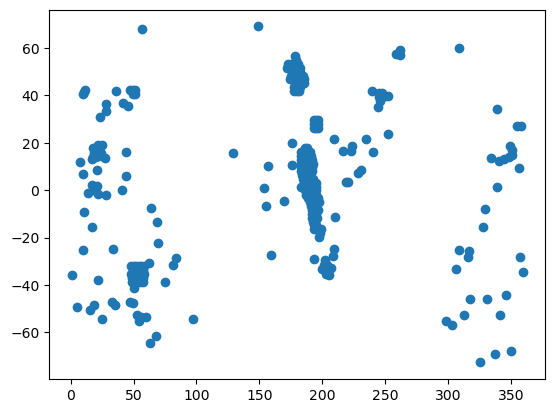

In [39]:
plt.scatter(RAmain,decmain)

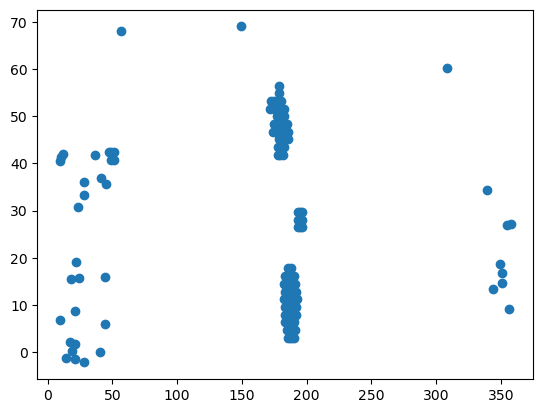

In [40]:
plt.scatter(RAmainq,DECmainq)

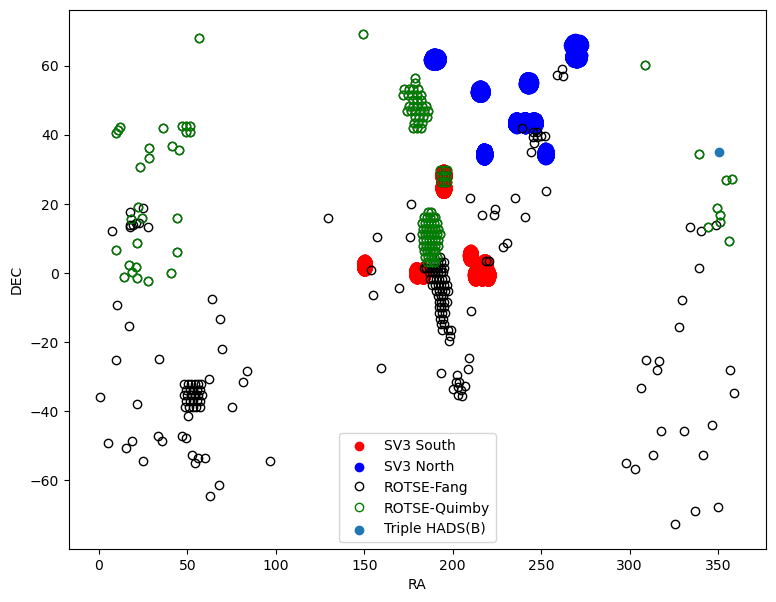

In [41]:
plt.figure(figsize=(9,7))
plt.scatter(data2s['RA'],data2s['DEC'],color = 'r',label = 'SV3 South')
plt.scatter(data2n['RA'],data2n['DEC'],color='b',label = 'SV3 North')
plt.plot(RAmain,decmain,'o', mfc='none',color = 'k',label = 'ROTSE-Fang')
plt.plot(RAmainq,DECmainq,'o', mfc='none',color='g',label = 'ROTSE-Quimby')
plt.scatter(350.235208,34.86438,label="Triple HADS(B)")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.legend()

In [42]:
fov = 1.85 #rotse FOV = 1.85x1.85 deg
ra_ls = RAmain - (fov/2)/np.cos(decmain*(np.pi)/180)
ra_hs = RAmain + (fov/2)/np.cos(decmain*(np.pi)/180)
mdecls = decmain - fov/2
mdechs= decmain + fov/2
ra_lls = RAmain - (fov/2)/np.cos(mdecls*(np.pi)/180)
ra_lhs = RAmain + (fov/2)/np.cos(mdecls*(np.pi)/180)
ra_hls = RAmain - (fov/2)/np.cos(mdechs*(np.pi)/180)
ra_hhs = RAmain + (fov/2)/np.cos(mdechs*(np.pi)/180)

In [43]:
fov = 1.85 #rotse FOV = 1.85x1.85 deg
ra_lq = RAmainq - (fov/2)/np.cos(DECmainq*(np.pi)/180)
ra_hq = RAmainq + (fov/2)/np.cos(DECmainq*(np.pi)/180)
mdeclq = DECmainq - fov/2
mdechq= DECmainq + fov/2
ra_llq = RAmainq - (fov/2)/np.cos(mdeclq*(np.pi)/180)
ra_lhq = RAmainq + (fov/2)/np.cos(mdeclq*(np.pi)/180)
ra_hlq = RAmainq - (fov/2)/np.cos(mdechq*(np.pi)/180)
ra_hhq = RAmainq + (fov/2)/np.cos(mdechq*(np.pi)/180)

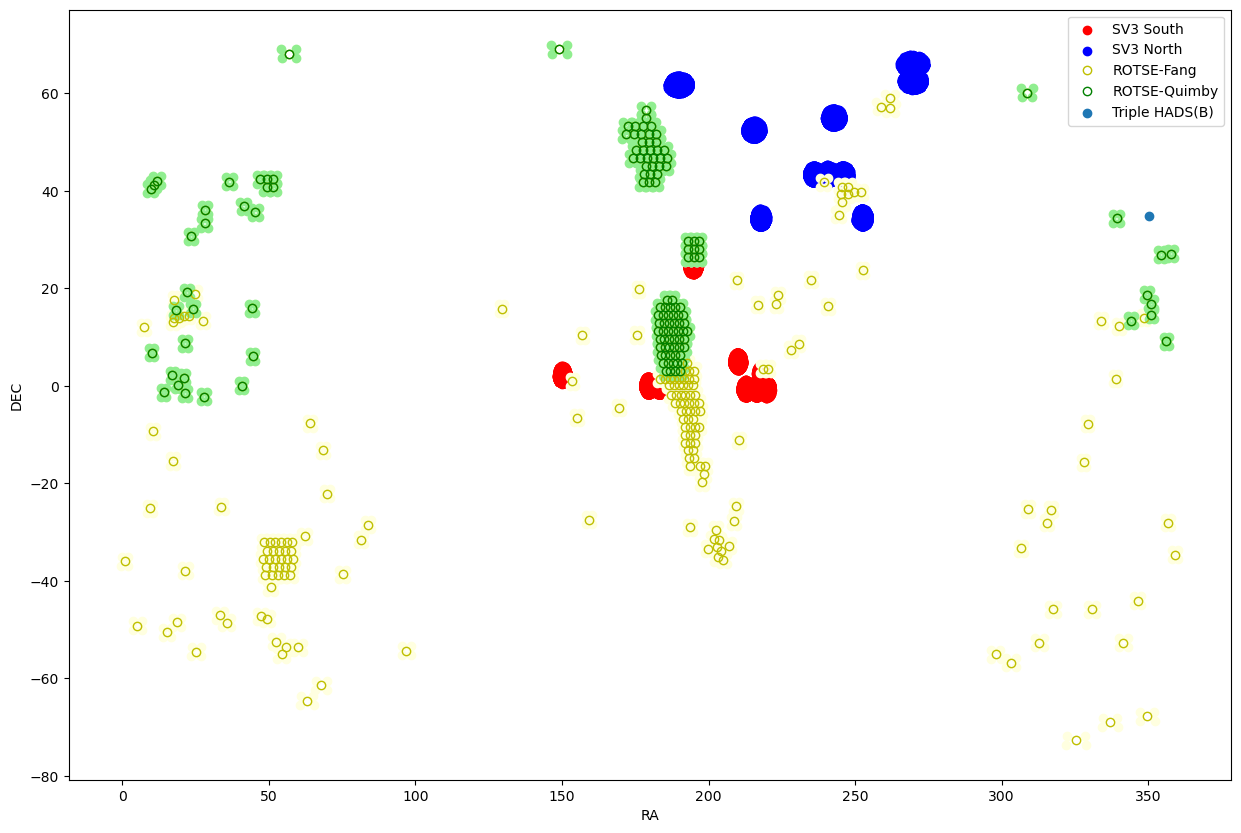

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(data2s['RA'],data2s['DEC'],color = 'r',label = 'SV3 South')
plt.scatter(data2n['RA'],data2n['DEC'],color='b',label = 'SV3 North')
plt.plot(RAmain,decmain,'o', mfc='none',color = 'y',label = 'ROTSE-Fang')
plt.scatter(ra_lls,mdecls,color = 'lightyellow')
plt.scatter(ra_lhs,mdecls,color = 'lightyellow')
plt.scatter(ra_hls,mdechs,color = 'lightyellow')
plt.scatter(ra_hhs,mdechs,color = 'lightyellow')
plt.plot(RAmainq,DECmainq,'o', mfc='none',color='g',label = 'ROTSE-Quimby')
plt.scatter(ra_llq,mdeclq,color = 'lightgreen')
plt.scatter(ra_lhq,mdeclq,color = 'lightgreen')
plt.scatter(ra_hlq,mdechq,color = 'lightgreen')
plt.scatter(ra_hhq,mdechq,color = 'lightgreen')
plt.scatter(350.235208,34.86438,label="Triple HADS(B)")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.legend()

In [45]:
#matched info

In [46]:
msouth = pd.read_csv('Matched_South_updated.csv',skiprows=0)
mnorth = pd.read_csv('Matched_North_updated.csv',skiprows=0)
mras = msouth['ra']
mran = mnorth['ra']
mdecs = msouth['dec']
mdecn = mnorth['dec']

In [47]:
#SN2023ixf 210.910674637, +54.3116510708

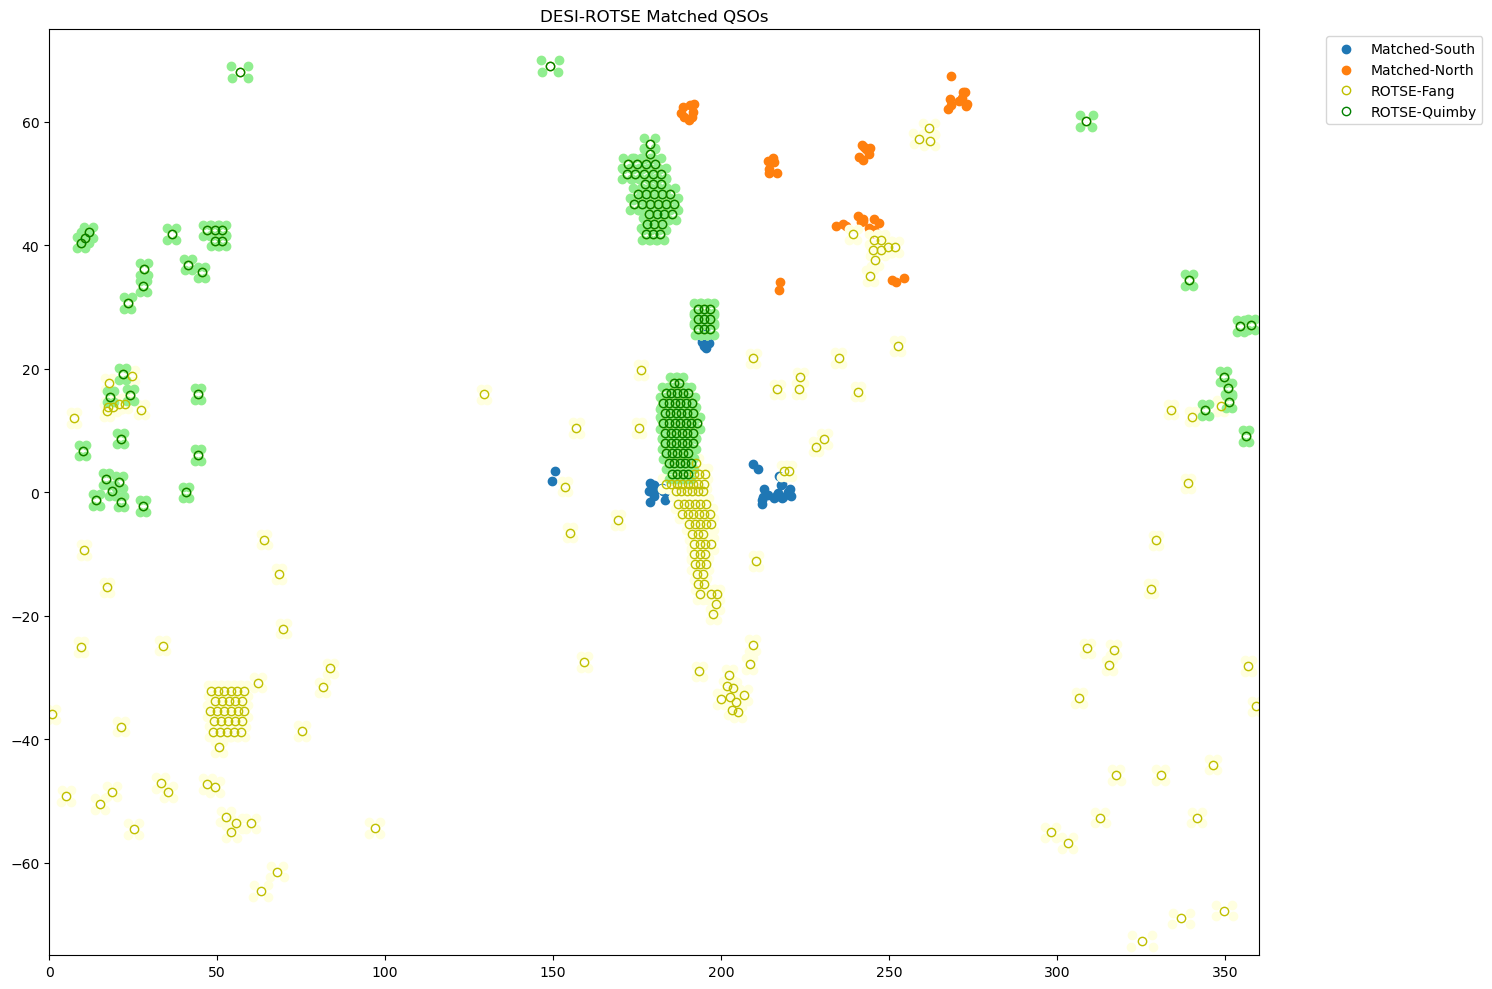

In [48]:
plt.figure(figsize=(15,10))
plt.scatter(mras,mdecs,label="Matched-South")
plt.scatter(mran,mdecn,label="Matched-North")
plt.plot(RAmain,decmain,'o', mfc='none',color = 'y',label = 'ROTSE-Fang')
plt.scatter(ra_lls,mdecls,color = 'lightyellow')
plt.scatter(ra_lhs,mdecls,color = 'lightyellow')
plt.scatter(ra_hls,mdechs,color = 'lightyellow')
plt.scatter(ra_hhs,mdechs,color = 'lightyellow')
plt.plot(RAmainq,DECmainq,'o', mfc='none',color='g',label = 'ROTSE-Quimby')
plt.scatter(ra_llq,mdeclq,color = 'lightgreen')
plt.scatter(ra_lhq,mdeclq,color = 'lightgreen')
plt.scatter(ra_hlq,mdechq,color = 'lightgreen')
plt.scatter(ra_hhq,mdechq,color = 'lightgreen')
plt.title("DESI-ROTSE Matched QSOs")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim(0,360)
plt.ylim(-75,75)
plt.tight_layout()
plt.show()

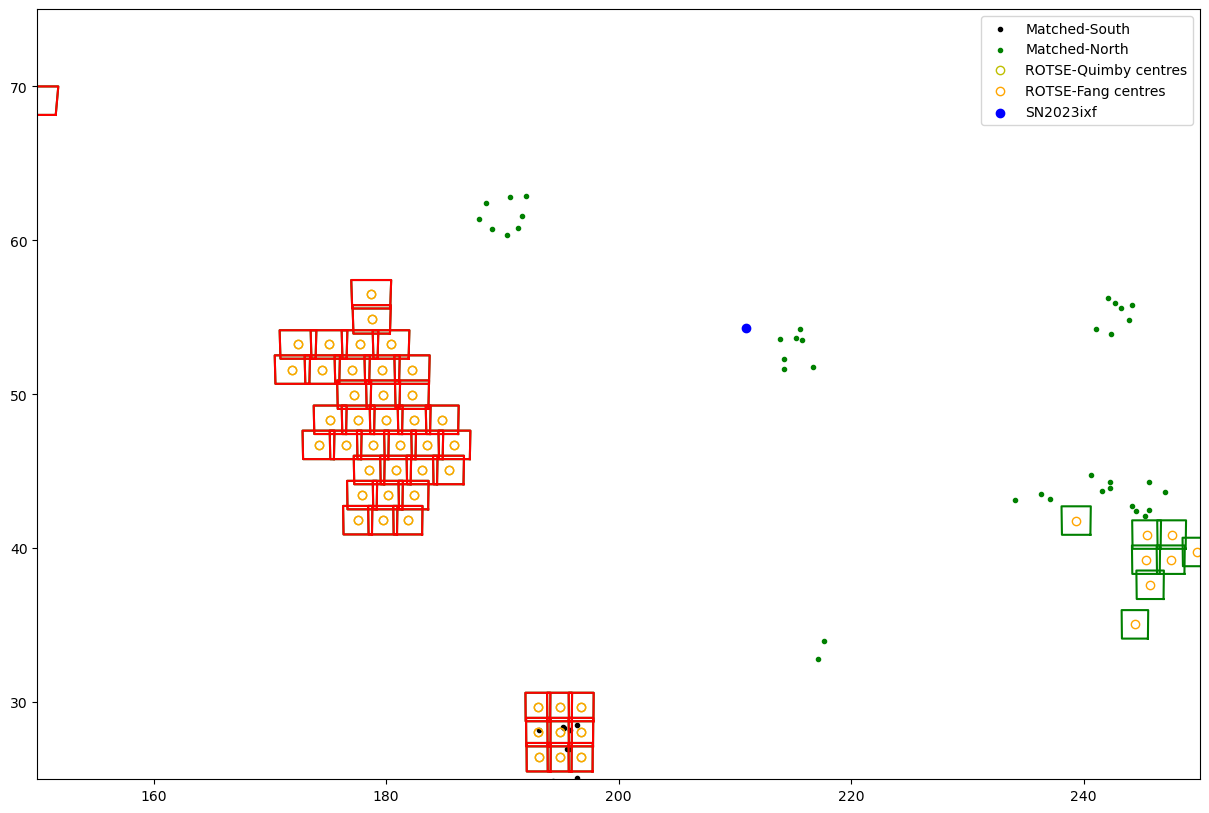

In [49]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

#coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
#coord = [[ra_lhs[1],mdecls[1]],[ra_lls[1],mdecls[1]],[ra_hls[1],mdechs[1]],[ra_hhs[1],mdechs[1]],[ra_lhs[1],mdecls[1]]]
coord = [[ra_lhs,mdecls],[ra_lls,mdecls],[ra_hls,mdechs],[ra_hhs,mdechs],[ra_lhs,mdecls]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

coordq = [[ra_lhq,mdeclq],[ra_llq,mdeclq],[ra_hlq,mdechq],[ra_hhq,mdechq],[ra_lhq,mdeclq]]
coordq.append(coordq[0]) #repeat the first point to create a 'closed loop'

xq, yq = zip(*coordq) #create lists of x and y values


#plt.figure()
plt.scatter(mras,mdecs,marker = '.',color = 'k',label="Matched-South")
plt.scatter(mran,mdecn,marker = '.',color = 'g',label="Matched-North")
plt.plot(xs,ys,color = 'green')#,label = "ROTSE - Fang") 
plt.plot(xq,yq,color = 'red')#,label = "ROTSE - Quimby") 
plt.plot(RAmainq,DECmainq,'o', mfc='none',color='y',label = 'ROTSE-Quimby centres')
plt.plot(RAmain,decmain,'o', mfc='none',color = 'orange',label = 'ROTSE-Fang centres')
plt.scatter(210.910674637, 54.3116510708, label = "SN2023ixf", color = 'blue')
plt.xlim(150,250)
plt.ylim(25,75)
plt.legend()

plt.show() # if you need...

In [50]:
fieldm = np.logical_and((np.logical_and(df['RA-decimal']>192/15, df['RA-decimal'] < 198/15)),(np.logical_and(df['DEC-decimal']>25, df['RA-decimal'] < 31)))

In [51]:
df[fieldm]

,Field,RA,DEC,Ecliptic,Ngal,Nnights,Nnights.1,Nnights.2,Nnights.3,Volume,DEC-0,DEC-1,DEC-2,RA-0,RA-1,RA-2,RA-decimal,DEC-decimal
217,C3,12:52:12,+29:41:34,32.2,660,0,211,0,0,30.69,29.0,41.0,34.0,12.0,52.0,12.0,12.870000,29.692778
219,C6,12:52:21,+28:03:46,30.7,1322,0,199,0,0,24.67,28.0,3.0,46.0,12.0,52.0,21.0,12.872500,28.062778
221,C9,12:52:27,+26:25:58,29.3,1056,0,194,0,0,24.43,26.0,25.0,58.0,12.0,52.0,27.0,12.874167,26.432778
237,C2,12:59:39,+29:41:34,32.9,1102,0,231,0,0,33.35,29.0,41.0,34.0,12.0,59.0,39.0,12.994167,29.692778
238,C8,12:59:40,+26:25:58,30,1300,0,206,0,0,29.67,26.0,25.0,58.0,12.0,59.0,40.0,12.994444,26.432778
239,C5,12:59:41,+28:03:46,31.5,1828,0,205,0,0,27.75,28.0,3.0,46.0,12.0,59.0,41.0,12.994722,28.062778
249,C7,13:06:54,+26:25:58,30.7,782,0,211,0,0,34.28,26.0,25.0,58.0,13.0,6.0,54.0,13.115000,26.432778
250,C4,13:07:00,+28:03:46,32.2,1246,0,219,0,0,35.93,28.0,3.0,46.0,13.0,7.0,0.0,13.116667,28.062778
251,C1,13:07:05,+29:41:34,33.7,942,0,229,0,51,41.44,29.0,41.0,34.0,13.0,7.0,5.0,13.118056,29.692778


In [52]:
df['RA-decimalmain'] = df['RA-decimal']*15
df['RA-decimalmain']

0             NaN
1        0.829167
2        5.116667
3        7.400000
4        9.500000
          ...    
319    354.487500
320    356.225000
321    356.916667
322    357.725000
323    359.179167
Name: RA-decimalmain, Length: 324, dtype: float64

In [53]:
mnorth

,ra,dec,Unnamed: 2
0,215.278614,53.629227,deg
1,215.754517,53.553293,deg
2,214.176793,52.303509,deg
3,214.176523,51.651946,deg
4,216.747328,51.772993,deg
5,213.892931,53.620573,deg
6,215.555102,54.229377,deg
7,217.645125,33.995931,deg
8,217.109877,32.802792,deg
9,241.079090,54.256755,deg


In [54]:
fieldmdesi = np.logical_and((np.logical_and(msouth['ra']>192, msouth['ra'] < 198)),(np.logical_and(msouth['dec']>25, msouth['dec'] < 31))) #checking overlapped fields

In [55]:
matchmain = msouth[fieldmdesi]
matchmain

,ra,dec,Unnamed: 2
1,195.706156,26.985365,deg
2,195.200454,28.389094,deg
3,195.804264,28.185488,deg
4,193.177045,28.213383,deg
5,195.512857,26.969180,deg
6,196.405578,28.501948,deg
7,195.253615,28.329095,deg
36,196.371655,25.108836,deg


In [56]:
hdus = pf.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/QSO_S_clustering.dat.fits') #North datafile


In [57]:
desidatasouth = hdus[1].data

In [58]:
desidatasouth

FITS_rec([(148.75137656, 3.24526769, 39627865737659286, 1, '1', 1.83117536, 1.        , 0., 1.71615675, 1., [-1, -1], 1., 1., 1., 3.46038672e-05, 0.82888779),
          (148.56692767, 2.90789662, 39627859697862012, 1, '1', 1.75399321, 1.        , 0., 1.69486603, 1., [-1, -1], 1., 1., 1., 3.40355248e-05, 0.83122386),
          (148.43269334, 2.2998934 , 39627841574276999, 2, '1-10', 2.1462451 , 1.        , 0., 1.67019721, 1., [-1, -1], 1., 1., 1., 2.23822685e-05, 0.88220324),
          ...,
          (151.17572944, 3.49822613, 39627871806820283, 2, '9-442', 2.23025674, 0.93333333, 0., 1.69904467, 1., [-1, -1], 1., 1., 1., 2.04652567e-05, 0.89119462),
          (151.48530557, 3.20973791, 39627865783796280, 2, '9-442', 1.55811806, 0.93333333, 0., 1.72366453, 1., [-1, -1], 1., 1., 1., 3.75922782e-05, 0.81681739),
          (151.028942  , 3.60857626, 39627871806817509, 2, '9-442', 1.45233787, 0.93333333, 0., 1.70170696, 1., [-1, -1], 1., 1., 1., 3.88167514e-05, 0.81197259)],
         dtype=

In [59]:
fieldmdesis = np.logical_and((np.logical_and(desidatasouth['RA']>192, desidatasouth['RA'] < 198)),(np.logical_and(desidatasouth['DEC']>25, desidatasouth['DEC'] < 31)))

In [60]:
finalmatchEDR = desidatasouth[fieldmdesis]
len(finalmatchEDR)

2605

In [61]:
finalmatchEDR['Z']

array([0.7448257 , 0.85966943, 2.68906633, ..., 1.38618566, 1.27268902,
       1.11065492])

In [62]:
from astropy.table import Table

In [63]:
finalmatchEDR_ROT = pd.DataFrame()
finalmatchEDR_TOT

NameError: name 'finalmatchEDR_TOT' is not defined

In [ ]:
finalmatchEDR_TOT =finalmatchEDR['DEC'] 

In [ ]:
finalmatchEDR_TOT

In [ ]:
c = SkyCoord(ra=matchmain['ra'], dec=matchmain['dec'],unit = 'deg')
catalog = SkyCoord(ra=desidatasouth['RA'], dec=desidatasouth['DEC'],unit = 'deg')
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

In [ ]:
max_sep = 0.01 * u.arcsec
idx, d2d, d3d = c.match_to_catalog_3d(catalog)
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]
len(catalog_matches)

In [ ]:
catalog_matches


In [ ]:
t=Table(desidatasouth)

In [ ]:
mask1 = ((t['RA'] > 193.1) &  (t['RA'] < 193.2) ) & ((t['DEC'] > 28.20) &(t['DEC'] < 28.22) )
mask2 = ((t['RA'] > 195.705) &  (t['RA'] < 195.707) ) & ((t['DEC'] > 26.9) &(t['DEC'] < 27) )
mask3 = ((t['RA'] > 195.803) &  (t['RA'] < 195.805) ) & ((t['DEC'] > 28.17) &(t['DEC'] < 28.19) )
mask4 = ((t['RA'] > 195.512) &  (t['RA'] < 195.514) ) & ((t['DEC'] > 26.96) &(t['DEC'] < 26.97) )
mask5 = ((t['RA'] > 195.248) &  (t['RA'] < 195.256) ) & ((t['DEC'] > 28.30) &(t['DEC'] < 28.33) )
mask6 = ((t['RA'] > 195.199) &  (t['RA'] < 195.201) ) & ((t['DEC'] > 28.36) &(t['DEC'] < 28.42) )
mask7 = ((t['RA'] > 196.401) &  (t['RA'] < 196.409) ) & ((t['DEC'] > 28.50) &(t['DEC'] < 28.52) )
mask8 = ((t['RA'] > 196.369) &  (t['RA'] < 196.400) ) & ((t['DEC'] > 25.10) &(t['DEC'] < 25.11) )

In [ ]:
t1 = t[mask1]
t2 = t[mask2]
t3 = t[mask3]
t4 = t[mask4]
t5 = t[mask5]
t6 = t[mask6]
t7 = t[mask7]
t8 = t[mask8]

In [ ]:
print([t1],[t2],[t3],[t4],[t5],[t6],[t7],[t8])

In [ ]:
data = [t1,t2,t3,t4,t5,t6,t7,t8]
pd.DataFrame(data)

In [ ]:
finaldata = pd.DataFrame()

In [ ]:
finaldata['RA'] = float(t1['RA']),float(t2['RA']),float(t3['RA']),float(t4['RA']),float(t5['RA']),float(t6['RA']),float(t7['RA']),float(t8['RA'])
finaldata['DEC'] = float(t1['DEC']),float(t2['DEC']),float(t3['DEC']),float(t4['DEC']),float(t5['DEC']),float(t6['DEC']),float(t7['DEC']),float(t8['DEC'])
finaldata['Z'] = float(float(t1['Z'])),float(t2['Z']),float(t3['Z']),float(t4['Z']),float(t5['Z']),float(t6['Z']),float(t7['Z']),float(t8['Z'])
finaldata['TARGETID'] = float(t1['TARGETID']),float(t2['TARGETID']),float(t3['TARGETID']),float(t4['TARGETID']),float(t5['TARGETID']),float(t6['TARGETID']),float(t7['TARGETID']),float(t8['TARGETID'])
finaldata

In [ ]:
finaldata.to_csv('EDRmatch_ROTSExDESI.csv')

In [ ]:
#readcsv = pd.read_csv('EDRmatch_ROTSExDESI.csv')
#readcsv

In [ ]:
plt.scatter(readcsv['RA'],readcsv['DEC'],marker = '*')
plt.xlabel('RA')
plt.ylabel('DEC')

In [ ]:
plt.scatter(readcsv['TARGETID'],readcsv['Z'],marker = '*',color='red')
plt.xlabel('TARGETID')
plt.ylabel('Redshift(Z)')